Prepared By:
- Ashish Sharma <accssharma@gmail.com>
- AI Saturdays (week 8 - July 14, 2018)
- AI Developers, Boise

# Using pre-trained models for feature extraction
- basis for Transfer Learning

In [1]:
# Imports related to Keras deep learning library
from keras import applications

from keras.models import Model

# https://keras.io/applications/#vgg19

from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input, VGG19

import numpy as np

from skimage import io, transform

Using TensorFlow backend.


In [2]:
import random
# reproduce random process 
random.seed(13278)

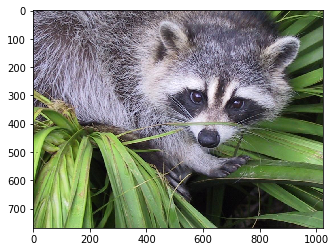

In [3]:
# random image generation
from scipy import misc
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [4]:
f.shape
#print (f)

(768, 1024, 3)

In [5]:
# make a dictionary of all the layers of VGG19 and the corresponding vector dimension
layer_dim_dict = {
    'fc2': 4096
}

# layer_dim_dict = {
#     'block1_conv1': 512,
#     'block1_conv2' : 512,
#     'block1_pool' : 231,
#     'block4_conv1' : 231,
#     'block4_conv2' : 232,
#     'block4_pool': 232,
#     'fc1': 4096,
#     'fc2': 4096,

# }
# your list of input images goes here - you can tweak how you want to handle images in batch
input_image_list = [f]

# REfer to the VGG19 architecture and look at the LAYER NAMES
## Number of outputs
# fc2 -> 4096
# block5_conv4 -> 512

def initialize_pre_trained_model(layer='fc2'):
    """
    takes in the layer name and return the model making the layer to be the target layer (default=fc2)
    """
    base_model = VGG19(weights='imagenet')
    return Model(inputs=base_model.input, outputs=base_model.get_layer(layer).output)

In [6]:
# expected input image size in Keras
INPUT_SHAPE = (224,224)

def image_preprocess(img_array):
    """image preprocess - 224x224x3 is standard for Keras, check the RGB, BGR ordering"""
    return transform.resize(img_array, INPUT_SHAPE)  

In [7]:
# TODO: you can change this to batch process many images - make sure the batch fits in your memory
def extract_feature(input_image, layer_specific_pret_model, layer_dim):
    """extract feature for single image"""
    res = image_preprocess(input_image)
    
    expanded_res = np.expand_dims(res, axis=0)
    
    # use VGG19's preprocess_input method to properly process the image
    expanded_feature_vector = preprocess_input(expanded_res)
    
     # finally generate feature vectors
    this_image_feature = layer_specific_pret_model.predict(expanded_feature_vector)[0]
    
    # make sure the extracted feature vector for this image
    print ("Extracted Layer dimension: ", len(this_image_feature))
    #assert len(this_image_feature) == layer_dim
    
    return this_image_feature

In [8]:
## Utility function to store the image in compact binary format (pickle)
import pickle

def write_features_to_disk(feature_list, output_pkl_file_name, image_class_list=[]):
    pkl_object = {"Features": feature_list, "OriginalLabel": image_class_list}
    output_pkl_tr = open(output_pkl_file_name, "wb")
    pickle.dump(pkl_object, output_pkl_tr, 2)
    output_pkl_tr.close()

In [9]:
## Main loop for loading the model for each layer and extract features for all the iages

for layer, layer_dim in layer_dim_dict.items():
    # you can load the model specific for this layer once for all the images
    pretrained_model_ready_for_this_layer = initialize_pre_trained_model(layer)
    
    
    
    all_extracted_image_list_for_all_images = []
    # use the above loaded model for feature extraction in your image list
    for img in input_image_list:
        print("extracting features for layer {} and expects {} dimensions:".format(layer, layer_dim))
        
        final_feature_vector = extract_feature(img, pretrained_model_ready_for_this_layer, layer_dim)
        
        print("Extracted features: ", final_feature_vector)
        print("Extracted features shape: ", final_feature_vector.shape)
        
        all_extracted_image_list_for_all_images.append(final_feature_vector)
        # remove this when you are ready for more images
        #break
    
    output_pkl_name_this_layer = "VGG19_extracted_features_{}.pkl".format(layer)
    write_features_to_disk(all_extracted_image_list_for_all_images, output_pkl_name_this_layer)
    
    # remove this when you are ready for more layers
    #break

extracting features for layer fc2 and expects 4096 dimensions:


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Extracted Layer dimension:  4096
Extracted features:  [ 0.          0.91540235  0.         ...,  0.          0.01403368  0.        ]
Extracted features shape:  (4096,)


In [15]:
%%bash
ls

face.png
Keras_Feature_Extraction.ipynb
VGG19_extracted_features_fc2.pkl
